In [1]:
import pandas as pd
import anndata
import matplotlib.pyplot as plt
from ALLCools.plot import *

In [2]:
adata = anndata.read_h5ad('../../../../data/Brain/SMART-seq/HIP+CA.SMART-seq.ABI.h5ad')

In [3]:
adata.obs.groupby('MajorType')['class_label'].value_counts().unstack()

class_label,GABAergic,Glutamatergic,Non-neuronal
MajorType,,,
Astro,NaN,NaN,17.0
CA1sp,NaN,1475.0,NaN
CA1sp/SUB-sp Kcnip1,NaN,115.0,NaN
CA2sp/IG,NaN,20.0,NaN
CA3sp,NaN,321.0,NaN
DG,NaN,2491.0,NaN
IT RHP Dcn,NaN,5.0,NaN
L6 CT,NaN,2.0,NaN
L6b,NaN,1.0,NaN


In [4]:
use_clusters = [
    'DG', 'CA1sp', 'Lamp5 Lhx6', 'Vip', 'CA3sp', 'Sst', 'Sncg/Ndnf HPF',
    'Lamp5', 'CA1sp/SUB-sp Kcnip1', 'Sncg', 'Pvalb', 'SUB-Sp Ndst4',
    'CA2sp/IG', 'Macrophage', 'Astro', 'Serpinf1', 'Sst Chodl', 'Oligo'
]
adata = adata[adata.obs['MajorType'].isin(use_clusters), :]

In [5]:
integration_group = {
    'Astro': 'Glia',
    'CA1sp': 'Exc',
    'CA1sp/SUB-sp Kcnip1': 'Exc',
    'CA2sp/IG': 'Exc',
    'CA3sp': 'Exc',
    'DG': 'DG',
    'IT RHP Dcn': 'Exc',
    'L6 CT': 'Exc',
    'L6b': 'Exc',
    'Lamp5': 'Inh',
    'Lamp5 Lhx6': 'Inh',
    'Ly6g6e': 'Exc',
    'Macrophage': 'Glia',
    'Oligo': 'Glia',
    'PIR Six3': 'Inh',
    'Pvalb': 'Inh',
    'SUB-Sp Ndst4': 'Exc',
    'Serpinf1': 'Inh',
    'Sncg': 'Inh',
    'Sncg/Ndnf HPF': 'Inh',
    'Sst': 'Inh',
    'Sst Chodl': 'Inh',
    'Vip': 'Inh'
}

major_group = {
    'Exc': 'Neuron',
    'Inh': 'Neuron',
    'Glia': 'Glia',
    'DG': 'DG',
}
adata.obs['IntegrationGroup'] = adata.obs['MajorType'].map(integration_group).map(major_group)

Trying to set attribute `.obs` of view, copying.


In [6]:
for group, cells in adata.obs.groupby('IntegrationGroup'):
    _adata = adata[cells.index, :]
    _adata.write_h5ad(f'SMART.{group}.h5ad')

/home/hanliu/miniconda3/envs/allcools/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'IntegrationGroup' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'IntegrationGroup' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'IntegrationGroup' as categorical


In [6]:
_adata = adata[adata.obs['IntegrationGroup'] == 'Neuron', :]
_adata.obs = _adata.obs[['MajorType', 'SubType']]
_adata.var = _adata.var[[]]
_adata.write_h5ad(f'SMART.Neuron.h5ad')
_adata

AnnData object with n_obs × n_vars = 4051 × 24446
    obs: 'MajorType', 'SubType'

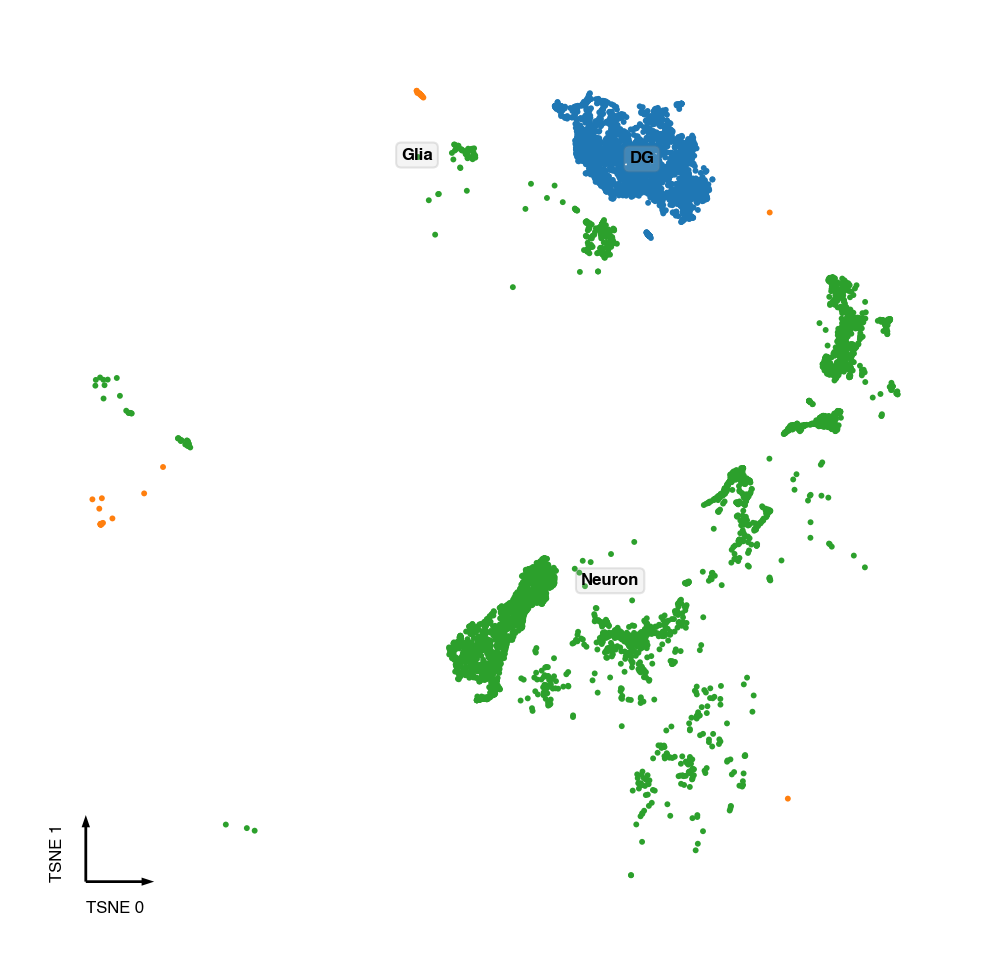

In [7]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

_ = categorical_scatter(ax=ax,
                        data=adata.obs,
                        coord_base='tsne',
                        hue='IntegrationGroup',
                        text_anno='IntegrationGroup',
                        s=2,
                        max_points=None)

In [8]:
adata

AnnData object with n_obs × n_vars = 6580 × 24446
    obs: 'cluster_color', 'cluster_order', 'cluster_label', 'class_color', 'class_order', 'class_label', 'subclass_color', 'subclass_order', 'subclass_label', 'full_genotype_color', 'full_genotype_order', 'full_genotype_label', 'donor_sex_color', 'donor_sex_order', 'donor_sex_label', 'region_color', 'region_order', 'region_label', 'cortical_layer_color', 'cortical_layer_order', 'cortical_layer_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_alt_alias_label', 'cell_type_designation_color', 'cell_type_designation_order', 'cell_type_designation_label', 'external_donor_name_color', 'external_donor_name_order', 'external_donor_name_label', 'facs_population_plan_color', 'facs_population_plan_order', 'facs_population_plan_label', 'injection_materials_color